# ML Implementation

In [21]:
# import libraries
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import lightgbm as ltb
import xgboost as xgb
import catboost as catb
import matplotlib.pyplot as plt

In [10]:
# import dataset
df = pd.read_csv("./cleaned_data/mental_health_data_2016-2021_ready_for_ML.csv")
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Have_mental_illness,Mental_illness_diagnosis,Sought_mental_treatment,Mental_illness_family_history,Mental_disorder_in_the_past,age_range
0,0,0,21,103,2,2,0,1,5,2
1,1,1,11,103,4,2,1,2,5,1
2,2,2,20,103,2,1,1,1,1,2


In [11]:
# drop unnamed columns
df = df.drop('Unnamed: 0', 1)
df = df.drop('Unnamed: 0.1', 1)
# Check all values of y
df['Have_mental_illness'].value_counts()

<ipython-input-11-a861e7cf2d30>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)
<ipython-input-11-a861e7cf2d30>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0.1', 1)


In [31]:
# Change values to 0 and 1
df["Have_mental_illness"].replace({2: 0, 4: 1}, inplace=True)

### LightGBM default

In [32]:
# Create train and test datasets
y=df["Have_mental_illness"]
X=df.drop("Have_mental_illness", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [33]:
model_lgbm = ltb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model_lgbm.predict(X_test)

In [34]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       210
           1       0.93      0.98      0.96       271

    accuracy                           0.95       481
   macro avg       0.95      0.95      0.95       481
weighted avg       0.95      0.95      0.95       481

[[191  19]
 [  5 266]]


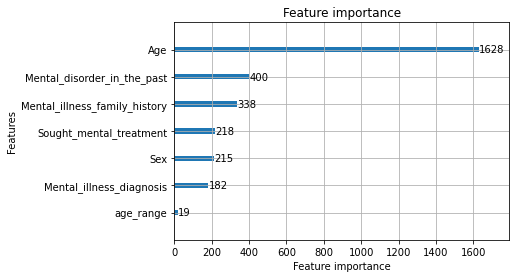

<Figure size 1152x864 with 0 Axes>

In [35]:
# Feature importance plot
ltb.plot_importance(model_lgbm)
plt.figure(figsize = (16, 12))
plt.show()

### XGBoost default

In [36]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model_xgb.predict(X_test)

In [37]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       210
           1       0.93      0.98      0.96       271

    accuracy                           0.95       481
   macro avg       0.95      0.94      0.95       481
weighted avg       0.95      0.95      0.95       481

[[190  20]
 [  5 266]]


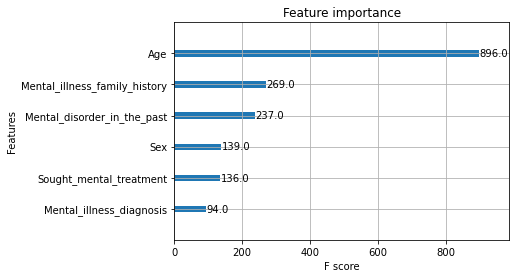

<Figure size 1152x864 with 0 Axes>

In [43]:
# Feature importance plot
xgb.plot_importance(model_xgb)
plt.figure(figsize = (16, 12))
plt.show()

### CatBoost default

In [38]:
model_catb = catb.CatBoostClassifier()
model_catb.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model_catb.predict(X_test)

Learning rate set to 0.013621
0:	learn: 0.6770967	total: 1.69ms	remaining: 1.69s
1:	learn: 0.6614340	total: 2.93ms	remaining: 1.46s
2:	learn: 0.6469738	total: 4.33ms	remaining: 1.44s
3:	learn: 0.6322449	total: 5.66ms	remaining: 1.41s
4:	learn: 0.6185787	total: 6.85ms	remaining: 1.36s
5:	learn: 0.6018101	total: 8.14ms	remaining: 1.35s
6:	learn: 0.5846806	total: 9.37ms	remaining: 1.33s
7:	learn: 0.5719225	total: 10.6ms	remaining: 1.32s
8:	learn: 0.5560129	total: 12.1ms	remaining: 1.33s
9:	learn: 0.5415745	total: 13.4ms	remaining: 1.32s
10:	learn: 0.5310675	total: 14.8ms	remaining: 1.33s
11:	learn: 0.5212608	total: 15.9ms	remaining: 1.31s
12:	learn: 0.5076941	total: 17.1ms	remaining: 1.29s
13:	learn: 0.4963896	total: 18.3ms	remaining: 1.29s
14:	learn: 0.4846445	total: 19.6ms	remaining: 1.29s
15:	learn: 0.4730207	total: 21ms	remaining: 1.29s
16:	learn: 0.4645792	total: 22.4ms	remaining: 1.29s
17:	learn: 0.4552512	total: 23.5ms	remaining: 1.28s
18:	learn: 0.4449659	total: 24.7ms	remaining: 

In [39]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       210
           1       0.93      0.99      0.96       271

    accuracy                           0.95       481
   macro avg       0.96      0.95      0.95       481
weighted avg       0.95      0.95      0.95       481

[[191  19]
 [  4 267]]


Text(0.5, 1.0, 'Feature Importance')

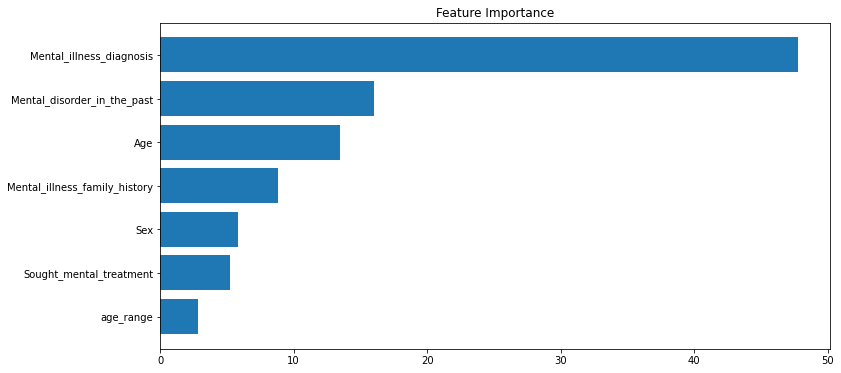

In [41]:
# Feature importance plot
import numpy as np
feature_importance = model_catb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


# ###########################################

## Parameter tuning

In [52]:
# Parameters used 

parameters = {'depth'         : [4,5,6,7,8,9,10],
              'learning_rate' : [0.1, 0.05, 0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100],
}

### CatBoost tuned

In [53]:
from sklearn.model_selection import GridSearchCV
Grid_CBC = GridSearchCV(estimator=model_catb, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

0:	learn: 0.6277339	total: 1.87ms	remaining: 147ms
1:	learn: 0.5741151	total: 2.81ms	remaining: 110ms
2:	learn: 0.5260088	total: 3.25ms	remaining: 83.5ms
3:	learn: 0.4878606	total: 4.1ms	remaining: 77.9ms
4:	learn: 0.4526953	total: 4.47ms	remaining: 67.1ms
5:	learn: 0.4212261	total: 5.07ms	remaining: 62.6ms
6:	learn: 0.3938110	total: 5.72ms	remaining: 59.7ms
7:	learn: 0.3702017	total: 6.37ms	remaining: 57.3ms
8:	learn: 0.3480891	total: 7.01ms	remaining: 55.3ms
9:	learn: 0.3318839	total: 7.67ms	remaining: 53.7ms
10:	learn: 0.3158483	total: 8.35ms	remaining: 52.3ms
11:	learn: 0.2980933	total: 8.88ms	remaining: 50.3ms
12:	learn: 0.2868798	total: 9.36ms	remaining: 48.3ms
13:	learn: 0.2767163	total: 10.1ms	remaining: 47.8ms
14:	learn: 0.2654165	total: 10.8ms	remaining: 46.9ms
15:	learn: 0.2558977	total: 11.3ms	remaining: 45.1ms
16:	learn: 0.2474791	total: 12.3ms	remaining: 45.7ms
17:	learn: 0.2409817	total: 13.6ms	remaining: 47ms
18:	learn: 0.2357754	total: 14.6ms	remaining: 46.9ms
19:	lear

In [54]:
model_catb_tuned = catb.CatBoostClassifier(
    depth=8, iterations=80, learning_rate=0.1
)
model_catb_tuned.fit(X_train, y_train)
expected_y_catb_tuned  = y_test
predicted_y_catb_tuned = model_catb_tuned.predict(X_test)

0:	learn: 0.6277339	total: 2.01ms	remaining: 159ms
1:	learn: 0.5741151	total: 4.52ms	remaining: 176ms
2:	learn: 0.5260088	total: 5.17ms	remaining: 133ms
3:	learn: 0.4878606	total: 6.37ms	remaining: 121ms
4:	learn: 0.4526953	total: 6.99ms	remaining: 105ms
5:	learn: 0.4212261	total: 8.12ms	remaining: 100ms
6:	learn: 0.3938110	total: 9.3ms	remaining: 97ms
7:	learn: 0.3702017	total: 10.9ms	remaining: 98.2ms
8:	learn: 0.3480891	total: 12ms	remaining: 94.5ms
9:	learn: 0.3318839	total: 13.7ms	remaining: 95.8ms
10:	learn: 0.3158483	total: 15.5ms	remaining: 97.3ms
11:	learn: 0.2980933	total: 16.8ms	remaining: 95.4ms
12:	learn: 0.2868798	total: 17.5ms	remaining: 90.4ms
13:	learn: 0.2767163	total: 19ms	remaining: 89.6ms
14:	learn: 0.2654165	total: 20.4ms	remaining: 88.5ms
15:	learn: 0.2558977	total: 21.3ms	remaining: 85.2ms
16:	learn: 0.2474791	total: 22.5ms	remaining: 83.5ms
17:	learn: 0.2409817	total: 23.7ms	remaining: 81.6ms
18:	learn: 0.2357754	total: 25.1ms	remaining: 80.4ms
19:	learn: 0.230

In [55]:
print(metrics.classification_report(expected_y_catb_tuned, predicted_y_catb_tuned))
print(metrics.confusion_matrix(expected_y_catb_tuned, predicted_y_catb_tuned))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       210
           1       0.93      0.99      0.96       271

    accuracy                           0.95       481
   macro avg       0.95      0.94      0.95       481
weighted avg       0.95      0.95      0.95       481

[[189  21]
 [  4 267]]


### XGBoost tuned

In [57]:
from sklearn.model_selection import GridSearchCV
Grid_CBC = GridSearchCV(estimator=model_xgb, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

[11:15:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              depth=4, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', iterations=10,
              learning_rate=0.04, max_bin=256, max_cat_to_onehot=4,
              max_delta_

In [62]:
model_xgb_tuned = xgb.XGBClassifier(
    depth=4, iterations=10, learning_rate=0.04
)
model_xgb_tuned.fit(X_train, y_train)
expected_y_xgb_tuned  = y_test
predicted_y_xgb_tuned = model_xgb_tuned.predict(X_test)

[11:18:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "depth", "iterations" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [63]:
print(metrics.classification_report(expected_y_xgb_tuned, predicted_y_xgb_tuned))
print(metrics.confusion_matrix(expected_y_xgb_tuned, predicted_y_xgb_tuned))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       210
           1       0.93      0.98      0.95       271

    accuracy                           0.95       481
   macro avg       0.95      0.94      0.95       481
weighted avg       0.95      0.95      0.95       481

[[191  19]
 [  6 265]]


### LightGBM tuned

In [64]:
from sklearn.model_selection import GridSearchCV
Grid_CBC = GridSearchCV(estimator=model_lgbm, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMClassifier(depth=4, iterations=10, learning_rate=0.03)

 The best score across ALL searched params:
 0.9516490800865801

 The best parameters across ALL searched params:
 {'depth': 4, 'iterations': 10, 'learning_rate': 0.03}


In [69]:
model_lgbm_tuned = ltb.LGBMClassifier(
         depth=4, iterations=10, learning_rate=0.03
)
model_lgbm_tuned.fit(X_train, y_train)
expected_y_lgbm_tuned = y_test
predicted_y_lgbm_tuned = model_lgbm_tuned.predict(X_test)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations


In [70]:
print(metrics.classification_report(expected_y_lgbm_tuned, predicted_y_lgbm_tuned))
print(metrics.confusion_matrix(expected_y_lgbm_tuned, predicted_y_lgbm_tuned))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       210
           1       0.92      0.99      0.96       271

    accuracy                           0.95       481
   macro avg       0.95      0.94      0.95       481
weighted avg       0.95      0.95      0.95       481

[[188  22]
 [  3 268]]


# ###########################################

## K-fold cross-validation 

### LightGBM default with 5-fold Cross-validation

In [75]:
from sklearn.model_selection import cross_val_score
model_lgbm_5fold = ltb.LGBMClassifier()
model_lgbm_5fold.fit(X_train, y_train)
model_lgbm_5fold.score(X_test, y_test)

0.9501039501039501

In [76]:
# Set cv to 5 
score_lgbm_5fold=cross_val_score(ltb.LGBMClassifier(),X, y,cv=5)
print(score_lgbm_5fold)
print('Avg :',np.average(score_lgbm_5fold))

[0.8960499  0.89189189 0.95841996 1.         0.99583333]
Avg : 0.9484390159390159


### XGBoost default with 5-fold Cross-validation

In [78]:
model_xgb_5fold = xgb.XGBClassifier()
model_xgb_5fold.fit(X_train, y_train)
model_xgb_5fold.score(X_test, y_test)

0.9480249480249481

In [80]:
# Set cv to 5 
score_xgb_5fold=cross_val_score(xgb.XGBClassifier(),X, y,cv=5)
print(score_xgb_5fold)
print('Avg :',np.average(score_xgb_5fold))

[0.89189189 0.88565489 0.95841996 1.         0.99791667]
Avg : 0.9467766805266805


### CatBoost default with 5-fold Cross-validation

In [81]:
model_catb_5fold = catb.CatBoostClassifier()
model_catb_5fold.fit(X_train, y_train)
model_catb_5fold.score(X_test, y_test)

Learning rate set to 0.013621
0:	learn: 0.6770967	total: 1.74ms	remaining: 1.73s
1:	learn: 0.6614340	total: 2.81ms	remaining: 1.4s
2:	learn: 0.6469738	total: 4.12ms	remaining: 1.37s
3:	learn: 0.6322449	total: 5.61ms	remaining: 1.4s
4:	learn: 0.6185787	total: 7.02ms	remaining: 1.4s
5:	learn: 0.6018101	total: 8.21ms	remaining: 1.36s
6:	learn: 0.5846806	total: 9.55ms	remaining: 1.35s
7:	learn: 0.5719225	total: 10.9ms	remaining: 1.35s
8:	learn: 0.5560129	total: 12.4ms	remaining: 1.36s
9:	learn: 0.5415745	total: 13.8ms	remaining: 1.37s
10:	learn: 0.5310675	total: 15.4ms	remaining: 1.38s
11:	learn: 0.5212608	total: 16.6ms	remaining: 1.37s
12:	learn: 0.5076941	total: 17.8ms	remaining: 1.35s
13:	learn: 0.4963896	total: 19.2ms	remaining: 1.35s
14:	learn: 0.4846445	total: 20.7ms	remaining: 1.36s
15:	learn: 0.4730207	total: 22ms	remaining: 1.35s
16:	learn: 0.4645792	total: 23.5ms	remaining: 1.36s
17:	learn: 0.4552512	total: 24.6ms	remaining: 1.34s
18:	learn: 0.4449659	total: 25.9ms	remaining: 1.3

0.9521829521829522

In [83]:
# Set cv to 5 
score_catb_5fold=cross_val_score(catb.CatBoostClassifier(),X, y,cv=5)
print(score_catb_5fold)
print('Avg :',np.average(score_catb_5fold))

Learning rate set to 0.013621
0:	learn: 0.6736951	total: 1.01ms	remaining: 1.01s
1:	learn: 0.6559551	total: 2.06ms	remaining: 1.03s
2:	learn: 0.6387261	total: 3.64ms	remaining: 1.21s
3:	learn: 0.6175256	total: 5.09ms	remaining: 1.27s
4:	learn: 0.6021671	total: 6.69ms	remaining: 1.33s
5:	learn: 0.5852246	total: 8.48ms	remaining: 1.41s
6:	learn: 0.5656744	total: 9.42ms	remaining: 1.34s
7:	learn: 0.5478453	total: 10.8ms	remaining: 1.34s
8:	learn: 0.5303627	total: 11.9ms	remaining: 1.31s
9:	learn: 0.5133916	total: 13.5ms	remaining: 1.33s
10:	learn: 0.5014760	total: 14.5ms	remaining: 1.3s
11:	learn: 0.4903695	total: 15.4ms	remaining: 1.27s
12:	learn: 0.4741219	total: 16.4ms	remaining: 1.24s
13:	learn: 0.4625278	total: 17.3ms	remaining: 1.22s
14:	learn: 0.4524838	total: 18.2ms	remaining: 1.2s
15:	learn: 0.4393939	total: 19.2ms	remaining: 1.18s
16:	learn: 0.4291826	total: 20.3ms	remaining: 1.17s
17:	learn: 0.4174378	total: 21.2ms	remaining: 1.16s
18:	learn: 0.4060649	total: 22ms	remaining: 1.